# Implementation of serialized K-Means 

Centralised version of readFile, assign2cluster, initialize_centroids, k-means and plot_centroids functions. The aim of this assignment is to implement a centralized version of the K-Means clustering algorithm with Python. The experiments will be carried out with the MNIST dataset.

### Preprocessing

The `serialReadFile` function reads data from a CSV file into a Pandas DataFrame, using the `pd.read_csv` method. It then removes a column named "label" from this DataFrame, modifying it in place. The function returns the modified DataFrame, now without the "label" column.

In [1]:
import pandas as pd
def serialReadFile(filename):
    data = pd.read_csv(filename)

    data.drop("label", axis=1, inplace=True)

    return data

### Assign to Cluster

The `serialAssign2cluster` function assigns a data point `x` to the nearest centroid from a list of centroids `centroids`, based on the Euclidean distance. For each centroid, it calculates the distance between `x` and the centroid, updating the minimum distance and the index of the closest centroid when a smaller distance is found. The function returns the index of the closest centroid to the data point `x`. This process is essential in clustering algorithms like K-means, where data points are iteratively assigned to the nearest centroid.

In [12]:
import numpy as np

def serialAssign2cluster(x, centroids):

    min_distance = np.inf  # Initialize the minimum distance to infinity
    closest_centroid_index = -1  # Initialize the index of the closest centroid

    # Iterate over each centroid to compute the Euclidean distance to the data point x
    for j, centroid in enumerate(centroids):
        centroid = np.array(centroid)  # Ensure centroid is a NumPy array
        distance = np.sqrt(np.sum((x - centroid) ** 2))

        # If the computed distance is less than the current minimum, update the minimum and index
        if distance < min_distance:
            min_distance = distance
            closest_centroid_index = j

    return closest_centroid_index

### K-Means

The `serialKMeans` function implements the K-Means clustering algorithm in a serial manner. It converts a Pandas DataFrame `X` into a NumPy array, initializes `K` centroids using the `initialize_centroids` function, and then iteratively updates these centroids over `n_iter` iterations. In each iteration, each data point in `X` is assigned to the closest centroid using the `serialAssign2cluster` function. The centroids are then updated to be the mean of the points in their cluster. If a cluster is empty, a new centroid is randomly generated. The function returns the final positions of the centroids after completing the specified number of iterations. This serial implementation is suitable for smaller datasets that can be processed without the need for distributed computing frameworks.

In [3]:
def initialize_centroids(data, K):
    """
    Initialize K centroids from a standard normal distribution.

    :param data: Pandas DataFrame, the dataset from which feature dimensions are determined.
    :param K: int, the number of centroids to initialize.
    :return: numpy array, initialized centroids.
    """
    # Number of features in the data
    num_features = data.shape[1]

    # Initialize centroids
    centroids = np.random.randn(K, num_features)

    return centroids


def serialKMeans(X, K, n_iter):

    X = X.values
    # Initialize centroids
    centroids = initialize_centroids(X, K)
    for _ in range(n_iter):
        # Initialize cluster assignment list
        clusters = [[] for _ in range(K)]
        print("Iteration: ", _)
        for sample in X:
            closest_centroid_index = serialAssign2cluster(sample, centroids)
            clusters[closest_centroid_index].append(sample)
        # Update centroids
        for i, cluster in enumerate(clusters):
            if len(cluster) != 0:
                centroids[i] = np.mean(cluster, axis=0)
            else:
                centroids[i] = np.random.randn(X.shape[1])

    return centroids

### Testing

This script employs a serial K-Means clustering algorithm on the MNIST dataset. It reads the dataset using `serialReadFile` into a DataFrame, performs clustering to find 10 centroids using `serialKMeans`, and then visualizes these centroids using the `plot_centroids` function. Each centroid is reshaped and displayed as a grayscale image, representing the average of the cluster's images. The script showcases a complete workflow of reading data, applying a machine learning algorithm, and visualizing the results.

In [5]:
import matplotlib.pyplot as plt

def plot_centroids(centroids, image_size=(28, 28)):
    """
    Plot each centroid as an image.

    :param centroids: numpy array, centroids with each row representing a centroid.
    :param image_size: tuple, the (height, width) of the images represented by the centroids.
    """
    for i, centroid in enumerate(centroids):
        # Reshape the centroid to the original image dimensions
        image = centroid.reshape(image_size)

        # Plot the image
        plt.figure()
        plt.imshow(image, cmap="gray")
        plt.title(f"Centroid {i+1}")
        plt.show()


Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9


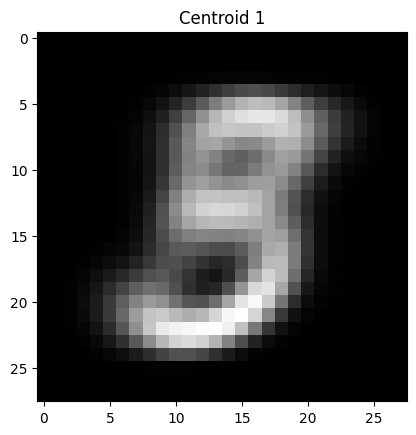

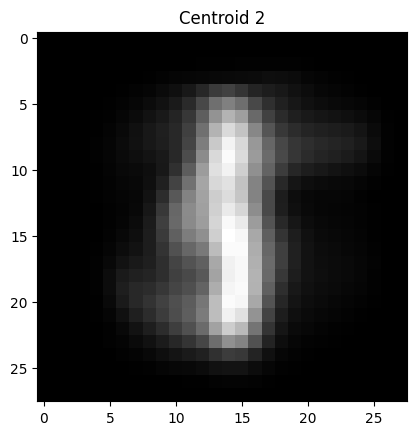

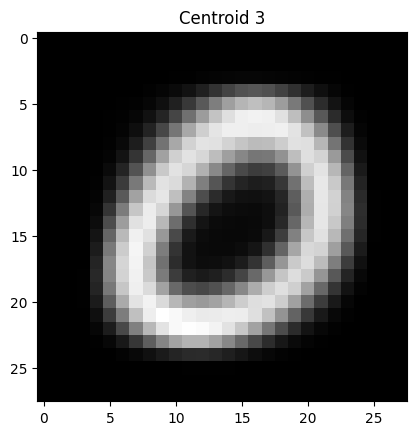

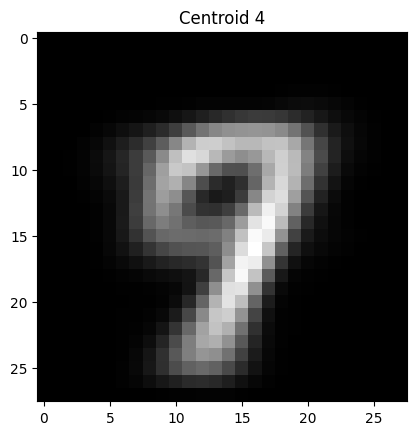

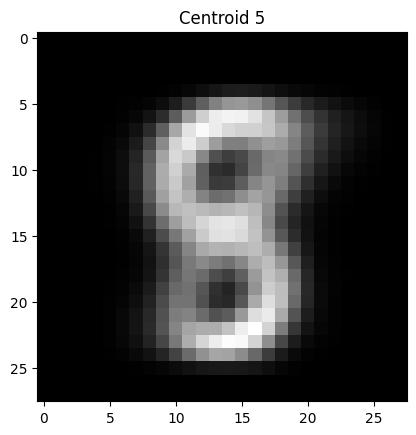

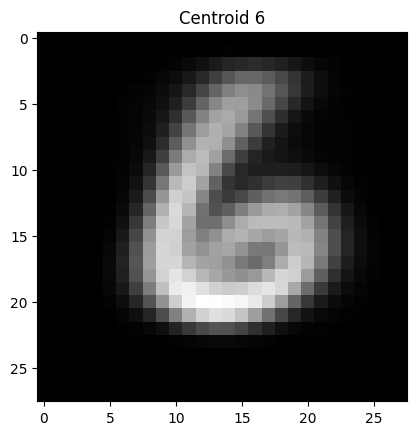

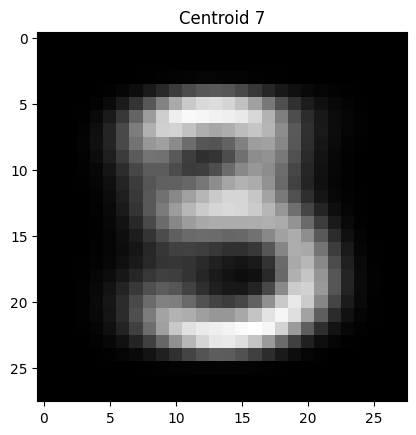

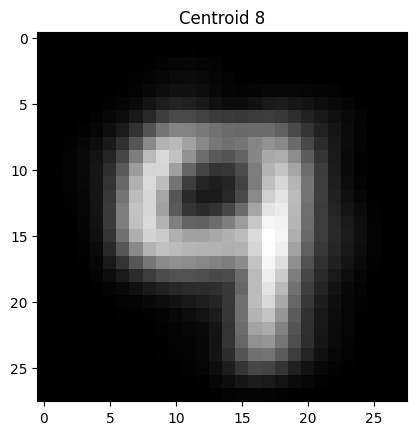

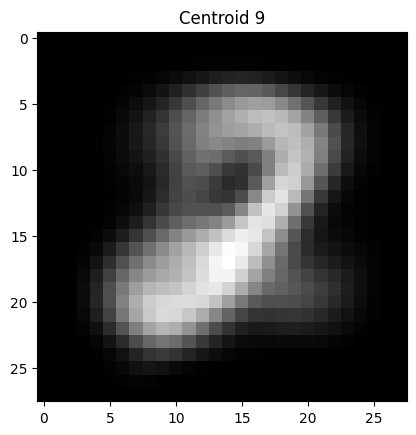

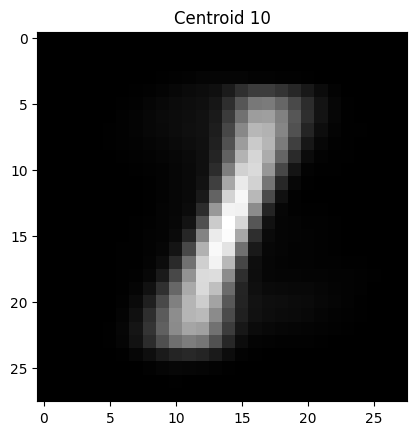

In [10]:
# read data
data = serialReadFile("data/tot_mnist_shuf.csv")
centroids = serialKMeans(data, 10, 10)
plot_centroids(centroids)